**Описание**  
Обрабатываются данные из датафрейма, полученного в файле poker.ipnb

In [ ]:
import pandas as pd
import numpy as np
import math
import glob
from datetime import datetime
import time

In [ ]:
direct = r'D:\Mary\work_var' #рабочий вариант выборки файлов

In [ ]:
start_time = datetime.now() #засекаю время начала работы
hands = 0 #переменная для подсчета общего кол-ва рук
players = pd.DataFrame(columns = ['player_id', 'PFR',	'VPIP',	'o_Limp',	'3bet', 'VPIP/PFR']) #создаю пустой датафрейм, в который буду собирать данные из всех файлов
for path in glob.iglob(f'{direct}/**/*.csv', recursive = True):
    print(f'Читаю файл {path}')
    players_1 = pd.read_csv(path, names = ['player_id', 'PFR',	'VPIP',	'o_Limp', '3bet', 'VPIP/PFR']) # считываю данные в датафрейм
    hands =+ len(players_1) #прибавляю кол-во рук из текущего файла
    players = pd.concat([players, players_1], axis = 0) #присоединяю текущий датафрейм к общему

print(f'Обработка заняла {datetime.now() - start_time} mc')
print(f'Общее кол-во рук {hands}')

In [ ]:
players = pd.read_csv(direct, names = ['player_id', 'PFR',	'VPIP',	'o_Limp',	'3bet', 'VPIP/PFR']) # считываю данные в датафрейм
players.head(20)

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR
0,Paleva 9,0,0,0,0,0
1,DerGamingOpa,0,0,0,0,0
2,MSoliva,0,0,0,0,0
3,09yra,1,1,0,0,0
4,44HE,1,1,0,1,0
5,WSOP72AA,0,0,0,0,0
6,ferdnando21,0,0,0,0,0
7,ludad18,0,0,0,0,0
8,antwerp168,0,0,0,0,0
9,Weevie91,0,0,0,0,0


In [ ]:
players.describe()

,PFR,VPIP,o_Limp,3bet,VPIP/PFR
count,397316.000000,397316.000000,397316.000000,397316.000000,397316.0
mean,0.146677,0.267422,0.026452,0.030968,0.0
std,0.353784,0.442615,0.160477,0.173231,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397316 entries, 0 to 397315
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  397316 non-null  object
 1   PFR        397316 non-null  int64 
 2   VPIP       397316 non-null  int64 
 3   o_Limp     397316 non-null  int64 
 4   3bet       397316 non-null  int64 
 5   VPIP/PFR   397316 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 18.2+ MB


In [ ]:
clastering = players.groupby('player_id').mean().reset_index() #сгруппированный по игрокам датасет с вычислением средних значений

In [ ]:
clastering.info() # общая информация по сгруппированному датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  5781 non-null   object 
 1   PFR        5781 non-null   float64
 2   VPIP       5781 non-null   float64
 3   o_Limp     5781 non-null   float64
 4   3bet       5781 non-null   float64
 5   VPIP/PFR   5781 non-null   float64
dtypes: float64(5), object(1)
memory usage: 271.1+ KB


In [ ]:
clastering['VPIP/PFR'] = (clastering['VPIP'] / clastering['PFR']) #вычисляю значения дополнительного параметры

In [ ]:
clastering.loc[ clastering['VPIP/PFR'].isna() ] #остались строки с NAN там где PFR и VPIP были 0

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR
14,$tr@teg@$1,0.0,0.0,0.0,0.0,NaN
222,AllanvigCRF,0.0,0.0,0.0,0.0,NaN
339,BandOficial,0.0,0.0,0.0,0.0,NaN
356,Belarus Ace,0.0,0.0,0.0,0.0,NaN
418,Botschna,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
5351,sprinty's,0.0,0.0,0.0,0.0,NaN
5472,tit2306,0.0,0.0,0.0,0.0,NaN
5565,valerisan,0.0,0.0,0.0,0.0,NaN
5570,valters661,0.0,0.0,0.0,0.0,NaN


In [ ]:
clastering.loc[ clastering['VPIP/PFR'] == np.inf ] #остались строки с NAN там где PFR был 0

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR
9,$hambala007,0.0,0.294118,0.196078,0.0,inf
26,00PokerKiller00,0.0,0.083333,0.000000,0.0,inf
42,10Nikewolf,0.0,0.285714,0.071429,0.0,inf
49,16Jerry8,0.0,0.363636,0.000000,0.0,inf
60,19ShakaL81,0.0,0.400000,0.200000,0.0,inf
...,...,...,...,...,...,...
5744,zakalako,0.0,0.333333,0.000000,0.0,inf
5753,zengan112,0.0,0.600000,0.400000,0.0,inf
5772,zooray,0.0,0.160000,0.080000,0.0,inf
5775,zumba303,0.0,0.615385,0.179487,0.0,inf


In [ ]:
clastering.loc[ clastering['VPIP/PFR'].isna(), 'VPIP/PFR' ] = -1 #присваиваю значениям c NaN метку -1

In [ ]:
clastering.loc[ clastering['VPIP/PFR'].isna() ] #теперь нет строк с NaN

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR


In [ ]:
clastering.loc[ clastering['VPIP/PFR'] == np.inf, 'VPIP/PFR' ] = -2 #присваиваю значениям c inf метку -2

In [ ]:
clastering.loc[ clastering['VPIP/PFR'] == np.inf ] #и нет строк с бесконечностью

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR


In [ ]:
clastering['VPIP/PFR'].value_counts()

VPIP/PFR
 1.000000     536
 2.000000     481
-2.000000     383
 1.500000     260
 1.333333     152
             ... 
 1.609756       1
 15.000000      1
 1.354430       1
 1.840000       1
 7.250000       1
Name: count, Length: 1031, dtype: int64

In [ ]:
"""Добавлю новые параметры, см.самый конец файла насчет выбора параметров
VPIP/PFR**2, PFR*o_Limp
"""
clastering['VPIP/PFR**2'] = (clastering['VPIP/PFR'])**2 #вычисляю значения дополнительного параметры
#clastering['expVPIP/PFR'] = np.exp(clastering['VPIP/PFR']) #получилась какая-то ерунда
#clastering['PFR*o_Limp'] = (clastering['PFR'] * clastering['o_Limp']) #тоже не очень повлияло
#clastering['PFR**4'] = (clastering['PFR'])**4
# clastering['o_Limp**4'] = (clastering['o_Limp'])**4 #еще квадрат пробовала и экспоненту, метрика ниже
clastering.head(5)

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR,VPIP/PFR**2
0,!Luefer92,0.104895,0.167832,0.013986,0.020979,1.600000,2.560000
1,!lrusputin!!,0.281250,0.375000,0.000000,0.000000,1.333333,1.777778
2,!pur7,0.213333,0.240000,0.006667,0.053333,1.125000,1.265625
3,"""ID""V4LsK1",0.220339,0.593220,0.016949,0.033898,2.692308,7.248521
4,#499#499#,0.074074,0.185185,0.000000,0.000000,2.500000,6.250000


In [ ]:
#записала в файл что получилось
clastering.to_csv(r'C:\Mary\clastering.csv', index = False, header = True)

**Подготовка к кластеризации**    
Признаки - 'PFR',	'VPIP',	'o_Limp',	'3bet', 'VPIP/PFR'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering

In [ ]:
#X = clastering[['PFR',	'VPIP',	'o_Limp',	'3bet', 'VPIP/PFR', 'VPIP/PFR**2', 'PFR*o_Limp']].copy() #признаки
X = clastering[['PFR',	'VPIP',	'o_Limp',	'3bet', 'VPIP/PFR', 'VPIP/PFR**2']].copy() #признаки
#y = clastering['player_id'].copy() #не участвует в кластеризацции

In [ ]:
X.describe()

,PFR,VPIP,o_Limp,3bet,VPIP/PFR,VPIP/PFR**2
count,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000
mean,0.166996,0.319227,0.039540,0.041130,1.958771,10.749804
std,0.143940,0.189441,0.091926,0.080947,2.629490,85.944942
min,0.000000,0.000000,0.000000,0.000000,-2.000000,1.000000
25%,0.090909,0.200000,0.000000,0.000000,1.285714,1.875709
50%,0.142857,0.270270,0.000000,0.024390,1.600000,2.938776
75%,0.200000,0.384615,0.037383,0.047619,2.166667,4.694444
max,1.000000,1.000000,1.000000,1.000000,65.000000,4225.000000


Признаки в разных пределах,т.к. все модели кластеризации работают с расстояниями, то
смасштабирую все признаки чтобы они были в одних пределах
НЕ МАСШТАБИРОВАЛА, СМ,НИЖЕ

In [ ]:
#Сейчас все параметры имеют среднее 0 и стандартное отклонение 1
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_scaled.mean(axis = 0), X_scaled.std(axis = 0)
#Метркиа и визуально после масштабирования сталогораздо хуже. В среднем метрика силуэт около 0,3 -0,53
# не буду делать масштабирование

(array([-1.65928506e-17,  1.69615806e-16,  4.91640018e-18,  2.94984011e-17,
         4.02530265e-17]),
 array([1., 1., 1., 1., 1.]))

In [ ]:
#проверка оптимального количества кластеров методом локтя
k_inertia = [] #создаю список для сумм квадратов внутрикластерных расстояний, рассчитываем для каждого кол-ва кластеров
ks = range(1,10) #задаю диапазон кластеров
for k in ks:
  clf_kmeans = KMeans(n_clusters = k)
  clusters_kmeans = clf_kmeans.fit_predict(X)
  k_inertia.append(clf_kmeans.inertia_)

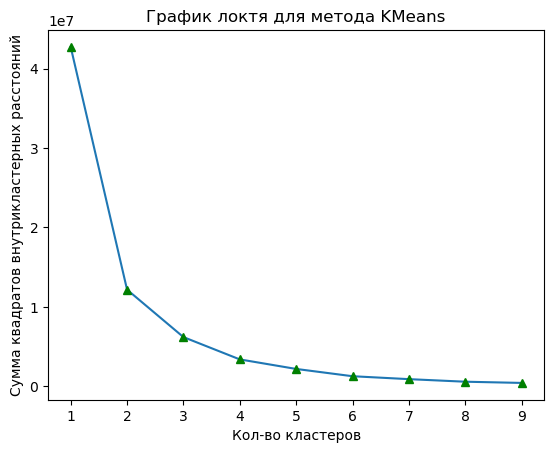

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'g^')
plt.title('График локтя для метода KMeans')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма квадратов внутрикластерных расстояний')
plt.show()

Судя по графику совсем переломной точкой является 2, возможно 3. Дальше проверю еще

Уменьшение количества признаков до 2-х для возможности визуализации. Сравню 2 модели TSNE и PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [ ]:
pca = PCA(n_components = 2) #Инициализирую модель метода главных компонент
X_pca = pca.fit_transform(X) #обучаю на параметрах

In [ ]:
X_pca.shape

(5781, 2)

In [ ]:
X_pca.shape

(5781, 2)

In [ ]:
tsne = TSNE(random_state = 42, perplexity = 25) #модель TSNE уменьшение размерности
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(5781, 2)

**Кластеризация при помощи алгоритма KMeans**

In [ ]:
kmeans = KMeans(n_clusters = 2) #создаем объект кластеризации c 2-мя кластерами
clusters = kmeans.fit_predict(X) #обучаем модель на данных, каждой точке присваивается свой кластер
clastering.insert(6, 'cluster_2', clusters, False) #записываю в исходный датафрейм
clastering.head()

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR,cluster_2,VPIP/PFR**2
0,!Luefer92,0.104895,0.167832,0.013986,0.020979,1.600000,0,2.560000
1,!lrusputin!!,0.281250,0.375000,0.000000,0.000000,1.333333,0,1.777778
2,!pur7,0.213333,0.240000,0.006667,0.053333,1.125000,0,1.265625
3,"""ID""V4LsK1",0.220339,0.593220,0.016949,0.033898,2.692308,0,7.248521
4,#499#499#,0.074074,0.185185,0.000000,0.000000,2.500000,0,6.250000


In [ ]:
kmeans = KMeans(n_clusters = 4) #создаем объект кластеризации c 4-мя кластерами
clusters = kmeans.fit_predict(X) #обучаем модель на данных, каждой точке присваивается свой кластер
clastering.insert(7, 'cluster_4', clusters, False) #записываю в исходный датафрейм
clastering.head()

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR,cluster_2,cluster_4,VPIP/PFR**2
0,!Luefer92,0.104895,0.167832,0.013986,0.020979,1.600000,0,0,2.560000
1,!lrusputin!!,0.281250,0.375000,0.000000,0.000000,1.333333,0,0,1.777778
2,!pur7,0.213333,0.240000,0.006667,0.053333,1.125000,0,0,1.265625
3,"""ID""V4LsK1",0.220339,0.593220,0.016949,0.033898,2.692308,0,0,7.248521
4,#499#499#,0.074074,0.185185,0.000000,0.000000,2.500000,0,0,6.250000


In [ ]:
kmeans = KMeans(n_clusters = 3) #создаем объект кластеризации c 3-мя кластерами
clusters = kmeans.fit_predict(X) #обучаем модель на данных, каждой точке присваивается свой кластер
clastering.insert(8, 'cluster_3', clusters, False) #записываю в исходный датафрейм
clastering.head()

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR,cluster_2,cluster_4,cluster_3,VPIP/PFR**2
0,!Luefer92,0.104895,0.167832,0.013986,0.020979,1.600000,0,0,0,2.560000
1,!lrusputin!!,0.281250,0.375000,0.000000,0.000000,1.333333,0,0,0,1.777778
2,!pur7,0.213333,0.240000,0.006667,0.053333,1.125000,0,0,0,1.265625
3,"""ID""V4LsK1",0.220339,0.593220,0.016949,0.033898,2.692308,0,0,0,7.248521
4,#499#499#,0.074074,0.185185,0.000000,0.000000,2.500000,0,0,0,6.250000


In [ ]:
sil_K_3 = silhouette_score(X, clastering.cluster_3) # метрика качества кластеризации для 3-х кластеров
print(f'silhoette KMeans 3 кластера - {round(sil_K_3, 3)}')

sil_K_4 = silhouette_score(X, clastering.cluster_4) # метрика качества кластеризации для 4-х кластеров
print(f'silhoette KMeans 4 кластера - {round(sil_K_4, 3)}')

sil_K_2 = silhouette_score(X, clastering.cluster_2) # метрика качества кластеризации для 5-ти кластеров
print(f'silhoette KMeans 2 кластеров - {round(sil_K_2, 3)}')

silhoette KMeans 3 кластера - 0.979
silhoette KMeans 4 кластера - 0.943
silhoette KMeans 2 кластеров - 0.995


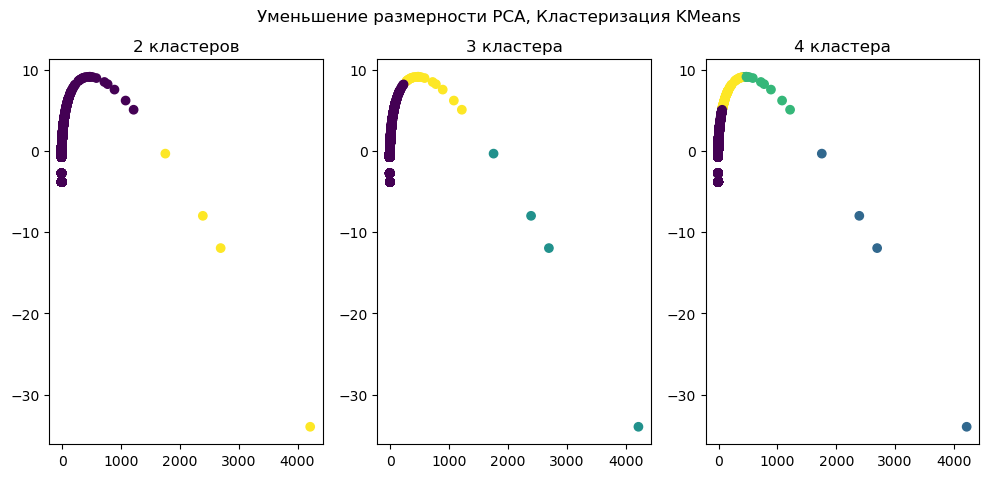

In [ ]:
plt.figure(figsize = (12,5))
plt.subplots_adjust(hspace = 0.5) #задаю расстояние между рисунками
plt.suptitle('Уменьшение размерности PCA, Кластеризация KMeans')

plt.subplot(1,3,1)
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.cluster_2)
plt.title('2 кластеров')

plt.subplot(1,3,2)
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.cluster_3)
plt.title('3 кластера')

plt.subplot(1,3,3)
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.cluster_4)
plt.title('4 кластера')

plt.show()

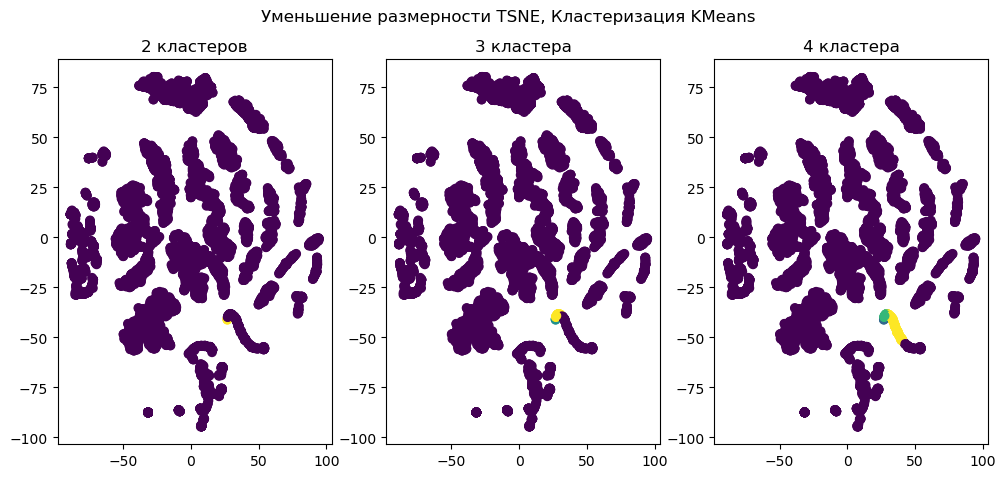

In [ ]:
plt.figure(figsize = (12,5))
plt.subplots_adjust(hspace = 0.5) #задаю расстояние между рисунками
plt.suptitle('Уменьшение размерности TSNE, Кластеризация KMeans')

plt.subplot(1,3,1)
plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.cluster_2)
plt.title('2 кластеров')

plt.subplot(1,3,2)
plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.cluster_3)
plt.title('3 кластера')

plt.subplot(1,3,3)
plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.cluster_4)
plt.title('4 кластера')

plt.show()

Агломеративная кластеризация

In [ ]:
for k in [3,4,2]: #перебираю число кластеров от 3 до 5
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')

    clusters = agg.fit_predict(X) #обучаем модель на данных, каждой точке присваивается свой кластер

    clastering.insert(9, f'Agg_clust_{k}', clusters, False) #записываю в исходный датафрейм

clastering.head()

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR,cluster_2,cluster_4,cluster_3,Agg_clust_2,Agg_clust_4,Agg_clust_3,VPIP/PFR**2
0,!Luefer92,0.104895,0.167832,0.013986,0.020979,1.600000,0,0,0,0,2,2,2.560000
1,!lrusputin!!,0.281250,0.375000,0.000000,0.000000,1.333333,0,0,0,0,2,2,1.777778
2,!pur7,0.213333,0.240000,0.006667,0.053333,1.125000,0,0,0,0,2,2,1.265625
3,"""ID""V4LsK1",0.220339,0.593220,0.016949,0.033898,2.692308,0,0,0,0,2,2,7.248521
4,#499#499#,0.074074,0.185185,0.000000,0.000000,2.500000,0,0,0,0,2,2,6.250000


In [ ]:
sil_A_3 = silhouette_score(X, clastering.Agg_clust_3) # метрика качества кластеризации для 3-х кластеров
print(f'silhoette AgglomerativeClustering 3 кластера - {round(sil_A_3, 3)}')

sil_A_4 = silhouette_score(X, clastering.Agg_clust_4) # метрика качества кластеризации для 4-х кластеров
print(f'silhoette AgglomerativeClustering 4 кластера - {round(sil_A_4, 3)}')

sil_A_2 = silhouette_score(X, clastering.Agg_clust_2) # метрика качества кластеризации для 5-ти кластеров
print(f'silhoette AgglomerativeClustering 2 кластеров - {round(sil_A_2, 3)}')

silhoette AgglomerativeClustering 3 кластера - 0.979
silhoette AgglomerativeClustering 4 кластера - 0.979
silhoette AgglomerativeClustering 2 кластеров - 0.995


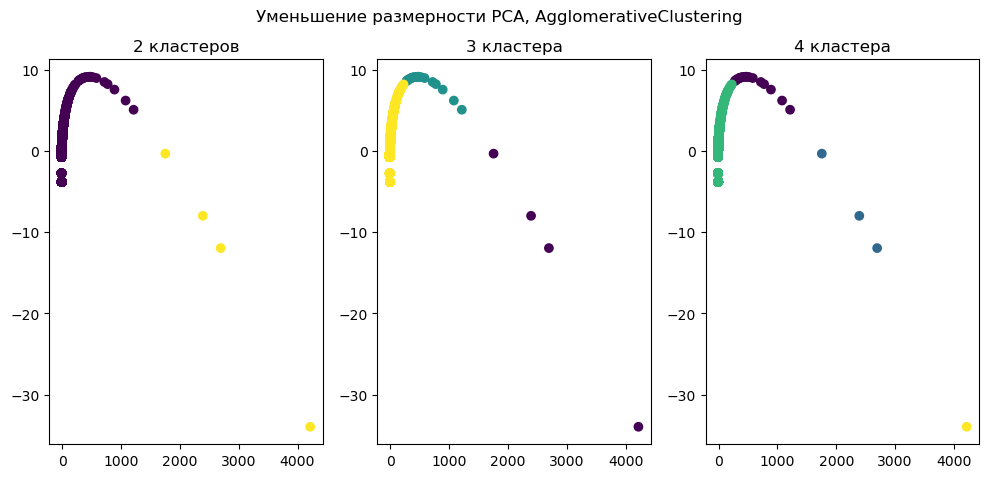

In [ ]:
plt.figure(figsize = (12,5))
plt.subplots_adjust(hspace = 0.5) #задаю расстояние между рисунками
plt.suptitle('Уменьшение размерности PCA, AgglomerativeClustering')

plt.subplot(1,3,1)
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.Agg_clust_2)
plt.title('2 кластеров')

plt.subplot(1,3,2)
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.Agg_clust_3)
plt.title('3 кластера')

plt.subplot(1,3,3)
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.Agg_clust_4)
plt.title('4 кластера')

plt.show()

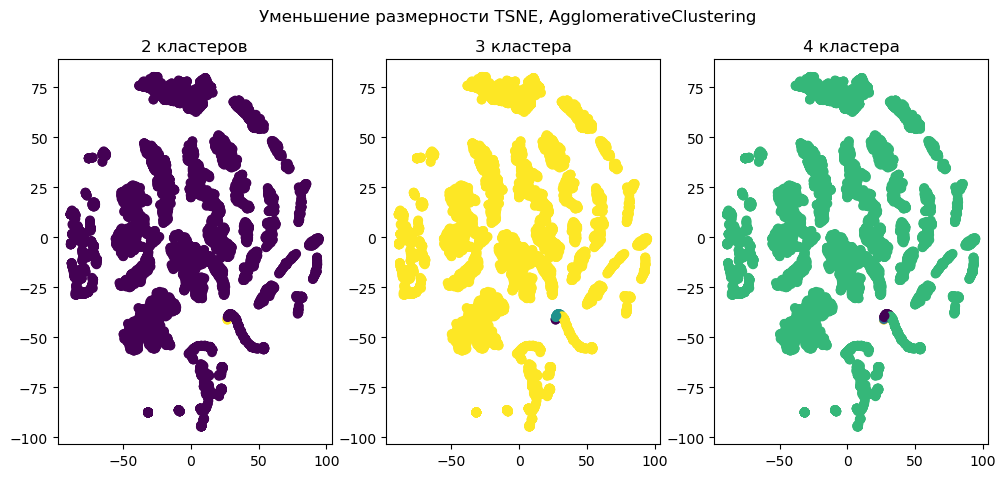

In [ ]:
plt.figure(figsize = (12,5))
plt.subplots_adjust(hspace = 0.5) #задаю расстояние между рисунками
plt.suptitle('Уменьшение размерности TSNE, AgglomerativeClustering')

plt.subplot(1,3,1)
plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.Agg_clust_2)
plt.title('2 кластеров')

plt.subplot(1,3,2)
plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.Agg_clust_3)
plt.title('3 кластера')

plt.subplot(1,3,3)
plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.Agg_clust_4)
plt.title('4 кластера')

plt.show()

Кластеризация DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.01, min_samples = 10)

clusters = dbscan.fit_predict(X) #обучаем модель на данных, каждой точке присваивается свой кластер

clastering.insert(12, 'DBSCAN', clusters, False) #записываю в исходный датафрейм

clastering.head()

,player_id,PFR,VPIP,o_Limp,3bet,VPIP/PFR,cluster_2,cluster_4,cluster_3,Agg_clust_2,Agg_clust_4,Agg_clust_3,DBSCAN,VPIP/PFR**2
0,!Luefer92,0.104895,0.167832,0.013986,0.020979,1.600000,0,0,0,0,2,2,-1,2.560000
1,!lrusputin!!,0.281250,0.375000,0.000000,0.000000,1.333333,0,0,0,0,2,2,-1,1.777778
2,!pur7,0.213333,0.240000,0.006667,0.053333,1.125000,0,0,0,0,2,2,-1,1.265625
3,"""ID""V4LsK1",0.220339,0.593220,0.016949,0.033898,2.692308,0,0,0,0,2,2,-1,7.248521
4,#499#499#,0.074074,0.185185,0.000000,0.000000,2.500000,0,0,0,0,2,2,-1,6.250000


In [ ]:
sil_D_3 = silhouette_score(X, clastering.DBSCAN) # метрика качества кластеризации для 3-х кластеров
print(f'silhoette DBSCAN {len(np.unique(dbscan.labels_))} кластера - {round(sil_D_3, 3)}')

silhoette DBSCAN 38 кластера - -0.643


In [ ]:
#кол-во кластеров. -1 - выбросы, 3 кластера 0,1,2
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [ ]:
#посмотреть сколько точек пометились как выбросы
len(dbscan.labels_[ dbscan.labels_ == -1])

337

In [ ]:
#вспомогательнная ячейка. Не то записала в столбец и удалила его чтобы не создавать весь датафрейм заново
#clastering = clastering.drop('DBSCAN', axis = 1)

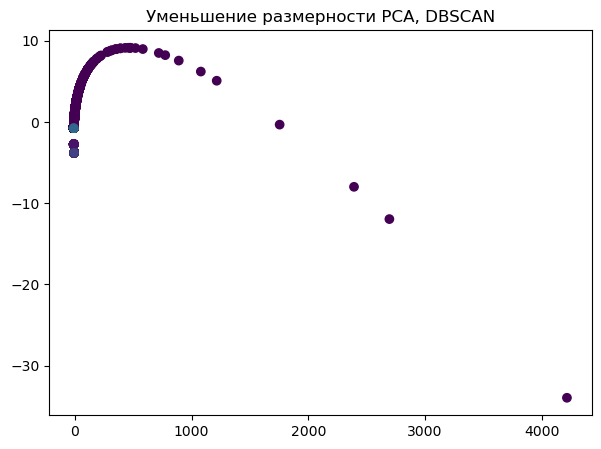

In [ ]:
plt.figure(figsize = (7,5))

plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = clastering.DBSCAN)
plt.title('Уменьшение размерности PCA, DBSCAN')
plt.show()

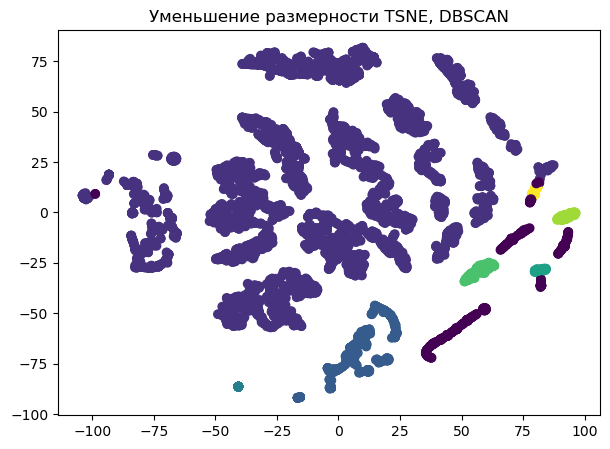

In [ ]:
plt.figure(figsize = (7,5))

plt.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], c = clastering.DBSCAN)
plt.title('Уменьшение размерности TSNE, DBSCAN')
plt.show()

Выводы:
Для кластеризации DBSCAN не подошел совсем, т.к. много точек определяются как выбросы и метрика silhouette_score 0,643.
Агломеративная кластеризация и KMeans выдали примерно одинаковый результат, но у агломеративной кластеризации немного выше метрика silhouette_score - 0,979.  
Можно выбрать агломеративную кластеризацию.   

Для виуализации лучше подошел алгоритм уменьшения размерности РСА, т.к. он нагляднее показывает разделение элементов и увязывается с графиком локтя - сильно больших переломов на нем нет.

*Попробую подобрать дополнительные параметры, т.к. без них метрика silhouette_score была около 0,7*     
Посчитаю корреляцию между признаками для. Потом добавлю новые признаки, сделанные из тех, у которых корр больше.

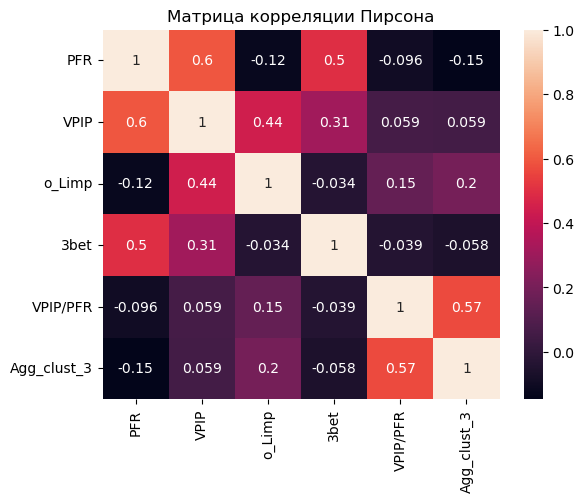

In [ ]:
sns.heatmap(clastering[['PFR', 'VPIP', 'o_Limp', '3bet', 'VPIP/PFR', 'Agg_clust_3']].corr(), annot = True)
plt.title('Матрица корреляции Пирсона Аггломерация 3 кластера')
plt.show()

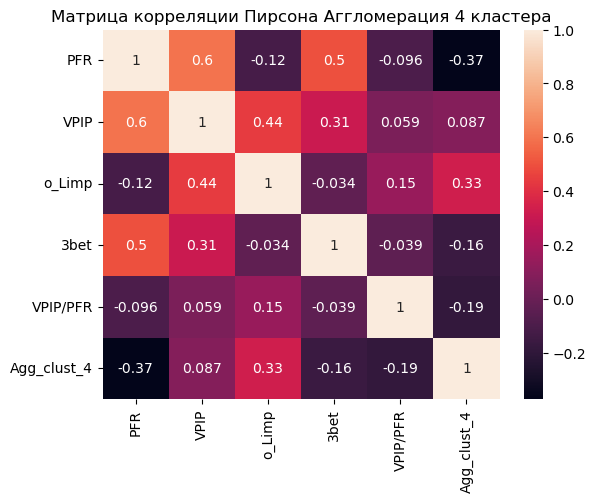

In [ ]:
sns.heatmap(clastering[['PFR', 'VPIP', 'o_Limp', '3bet', 'VPIP/PFR', 'Agg_clust_4']].corr(), annot = True)
plt.title('Матрица корреляции Пирсона Аггломерация 4 кластера')
plt.show()

Самая высокая по модулю корреляция PFR, o_Limp, VPIP/PFR
Селаю доп.параметры:
VPIP/PFR**2,      
PFR*o_Limp
и посмотрю что будет с метриками